**Task 1**

**Prediction Using Supervised ML**

predict the percentage of an student based on the no.of study hours.we wil use the simple linear regression

**What is Simple Linear Regression?**

Simple Linear Regression is finding the best relationship between the input variable x (independent variable) and the expected variable y (dependent variable). The linear relationship between these two variables can be represented by a straight line called regression line.

Formula : y = b0 + b1x

       y : is the response or the target variable

       x : is the feature

       b1 : is the coefficient of x

       b0 : is the intercept

Estimating ("Learning") Model Coefficients
The coefficients are estimated using the least-squares criterion, i.e., the best fit line has to be calculated that minimizes the sum of squared residuals (or "sum of squared errors").

**Dividing the code into steps for better understanding:**

       1-Load the dataset.

       2-Visualize the data.

       3-Training Simple Linear Regression Model.

**Step1 : Load Dataset**

In [1]:
#import the important library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the data 
data_url = "http://bit.ly/w-data"
data= pd.read_csv(data_url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[ : ,1].values

In [4]:
#splitting the data set to training and test set
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train , y_test = train_test_split(X,y,test_size = 0.2,
                                                         random_state=0)

In [5]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20,), (5,))

**Step 2: Visualize the data.**

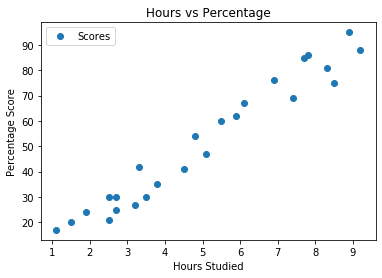

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

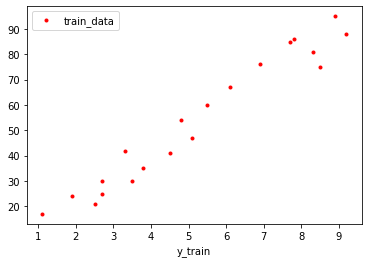

In [7]:
# Visualize Only Train data
plt.plot(X_train,y_train,'r.',label='train_data')
plt.xlabel('X_train')
plt.xlabel('y_train')
plt.legend()
plt.show()


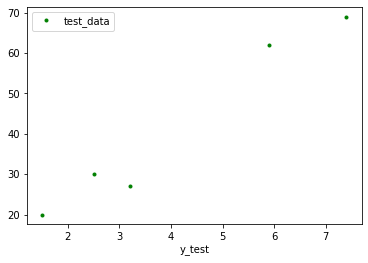

In [8]:
# Visualize Only Test data
plt.plot(X_test,y_test,'g.',label='test_data')
plt.xlabel('X_test')
plt.xlabel('y_test')
plt.legend()
plt.show()

**Step 3 :Training Simple Linear Regression Model.**

In [9]:
#create linear regression model 
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X ,y)

C:\Users\dell\Anaconda31\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\dell\Anaconda31\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

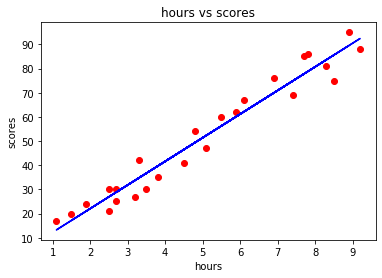

In [10]:
# Visualising the Training set results
line = regressor.coef_*X+regressor.intercept_  #regression line
plt.scatter(X , y , color = "red")
plt.plot(X , line , color = "blue")
plt.title("hours vs scores")
plt.xlabel("hours")
plt.ylabel("scores")
plt.show()



### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
 

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


In [13]:
# You can also test with your own data
hours = np.array(9.25).reshape((1,-1))
new_pred = regressor.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {new_pred}")

No of Hours = [[9.25]]
Predicted Score = [92.90985477]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.071877793635605
